In [49]:
%matplotlib inline 
import numpy as np
import pandas as pd
import random as rd
from PIL import Image
from matplotlib import pyplot as plt

In [50]:
def kmeansinit(X,k):
    randperm=[i for i in range(X.shape[0])]
    rd.shuffle(randperm)
    return X[tuple(randperm[0:k]),:]
    

In [51]:
def findClosestCentroids(X,centroids):
    idx=np.zeros(X.shape[0])
    for i in range(X.shape[0]):
        idx[0]=0
        min=(X[i,:]-centroids[0,:]).dot((X[i,:]-centroids[0,:]).T)
        for j in range(1,k):
            m=(X[i,:]-centroids[j,:]).dot((X[i,:]-centroids[j,:]).T)
            if m<=min:
                min=m
                idx[i]=j
    return idx

In [52]:
def computeCentroids(X,idx,k):
    m,n=X.shape
    centroids=np.zeros((k,n))
    for i in range(k):
        c=0
        centroids[i,:]=np.mean(X[idx==i],axis=0)
#         print(i,centroids[i,:])
    return centroids

In [53]:
def runkmeans(X,intitial_centroids,max_iters):
    
    m,n=X.shape
    k=initial_centroids.shape[0]
    centroids=initial_centroids
    idx=np.zeros(m)
    
#     print(centroids)
    
    for i in range(max_iters):
        idx=findClosestCentroids(X,centroids)
        centroids=computeCentroids(X,idx,k)
#         print(centroids)
    return centroids,idx
        

In [54]:
img=Image.open('bird_small.png')

print(img.format)
print(img.size)
print(img.mode)

PNG
(128, 128)
RGB


In [55]:
np_img=np.array(img)
print(np_img[0][0])

[219 180 103]


In [56]:
np_img=np_img/255
# np_img

In [57]:
X=np_img.reshape(img.size[0]*img.size[1],3)
# X

In [58]:
k=4
max_iters=10
initial_centroids=kmeansinit(X,k)
print(initial_centroids.shape)

(4, 3)


In [59]:
centroids,idx=runkmeans(X,initial_centroids,max_iters)
print(idx.dtype)

float64


In [60]:
# print(centroids)
X_recovered=centroids[idx.astype(int),:]
X_recovered=X_recovered.reshape(np_img.shape)

In [61]:
print(np_img[0][0])
print((X_recovered).astype(np.uint8)[100][120])

[0.85882353 0.70588235 0.40392157]
[0 0 0]


Text(0.5, 1.0, 'Compressed')

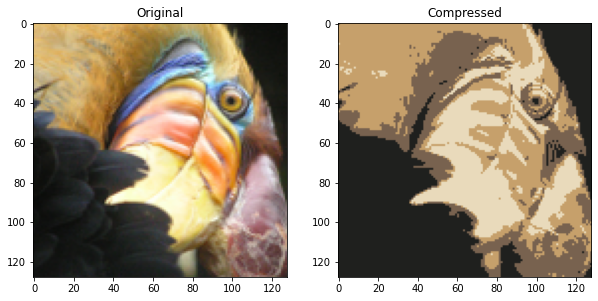

In [62]:
fig = plt.figure(figsize=(10, 7))


fig.add_subplot(1, 2, 1)
plt.imshow(np_img)
plt.title('Original')


fig.add_subplot(1, 2, 2)
plt.imshow(X_recovered)
plt.title('Compressed')




In [63]:
im = Image.fromarray((X_recovered).astype(np.uint8))
im.save("compressed.png")